In [11]:
!pip install kagglehub

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

import kagglehub


# Framing the Problem
qwerty

# Getting the data

In [13]:
# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 3.84MB/s]

Extracting files...
Path to dataset files: C:\Users\dsta0\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


In [15]:
df_housing = pd.read_csv(path+"/housing.csv")

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis

In [17]:
df_housing.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,20640.0,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
total_bedrooms,20433.0,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
households,20640.0,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
median_income,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,20640.0,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00


In [18]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


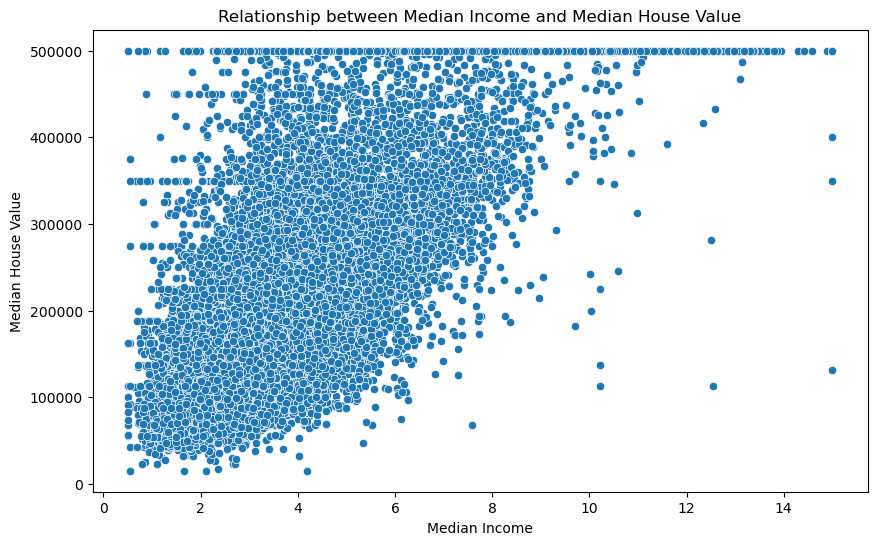

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_housing).set(
    title='Relationship between Median Income and Median House Value',
    xlabel='Median Income',
    ylabel='Median House Value')

plt.show()

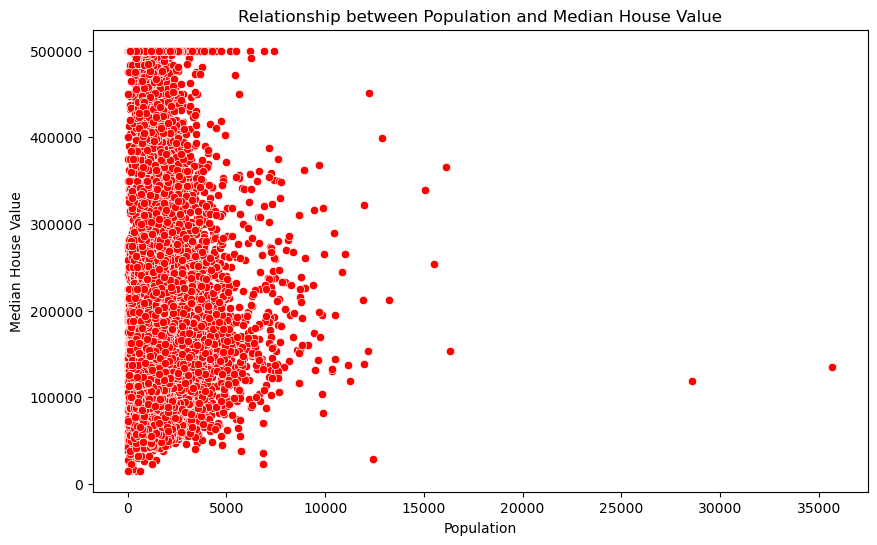

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=df_housing, color="red").set(
    title='Relationship between Population and Median House Value',
    xlabel='Population',
    ylabel='Median House Value')

plt.show()

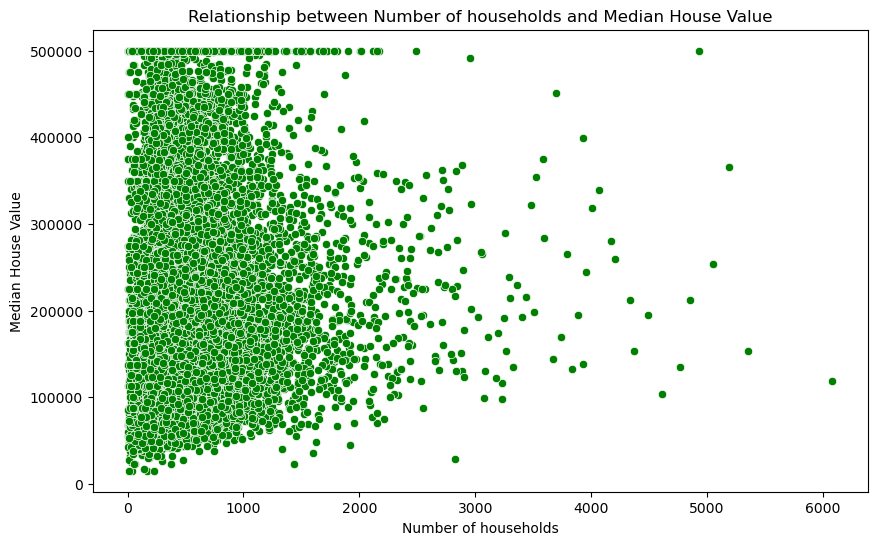

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=df_housing, color="green").set(
    title='Relationship between Number of households and Median House Value',
    xlabel='Number of households',
    ylabel='Median House Value')

plt.show()

# Linear Regression Models

In [38]:
# Independent variables
x1 = df_housing[["median_income"]]
x2 = df_housing[["population"]]
x3 = df_housing[["households"]]

# Dependent variable
y = df_housing[["median_house_value"]]

y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [40]:
# Linear Regression Models
lr_median_income = LinearRegression()
lr_population = LinearRegression()
lr_households = LinearRegression()

# Split the data (use the same random state for all splits to ensure all the y are the same)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=123)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=123)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.2, random_state=123)

# Training the models
lr_median_income.fit(x1_train, y1_train)
lr_population.fit(x2_train, y2_train)
lr_households.fit(x3_train, y3_train)

LinearRegression()

## Models' results and metrics

In [74]:
# Store the coefficients and slopes of the models
lr1_slope = lr_median_income.coef_[0][0]
lr2_slope = lr_population.coef_[0][0]
lr3_slope = lr_households.coef_[0][0]

lr1_intercept = lr_median_income.intercept_[0]
lr2_intercept = lr_population.intercept_[0]
lr3_intercept = lr_households.intercept_[0]

# Print the coefficients
print("Median House Value vs. Median Income")
print("\tCoefficients:", lr_median_income.coef_[0][0])
print("\tIntercept:", lr_median_income.intercept_[0])


Median House Value vs. Median Income
	Coefficients: 41844.33286884714
	Intercept: 45001.21749056192


In [75]:
# Make predictions
y1_pred = lr_median_income.predict(x1_test)
y2_pred = lr_population.predict(x2_test)
y3_pred = lr_households.predict(x3_test)

# Evaluate the models
#   Mean Absolute Error
mae1 = metrics.mean_absolute_error(y1_test, y1_pred)
mae2 = metrics.mean_absolute_error(y2_test, y2_pred)
mae3 = metrics.mean_absolute_error(y3_test, y3_pred)

#   Mean Squared Error
mse1 = metrics.mean_squared_error(y1_test, y1_pred)
mse2 = metrics.mean_squared_error(y2_test, y2_pred)
mse3 = metrics.mean_squared_error(y3_test, y3_pred)

In [82]:
# Display the results in a table
df = pd.DataFrame({
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [lr1_intercept, lr2_intercept, lr3_intercept],
    'Slope': [lr1_slope, lr2_slope, lr3_slope],
    'Mean Absolute Error': [mae1, mae2, mae3],
    'Mean Squared Error': [mse1, mse2, mse3]
})
df = df.round(4)
df = df.T
df.columns = df.iloc[0]
df = df.drop(df.iloc[0].index.name)
df.columns.name = None

df

,Median Income,Population,Households
Intercept,45001.2175,210554.0765,197381.3488
Slope,41844.3329,-2.5,19.0728
Mean Absolute Error,62695.804,91381.9662,90888.5451
Mean Squared Error,7063217141.4152,13289973985.1106,13228771859.041


## Displaying the results

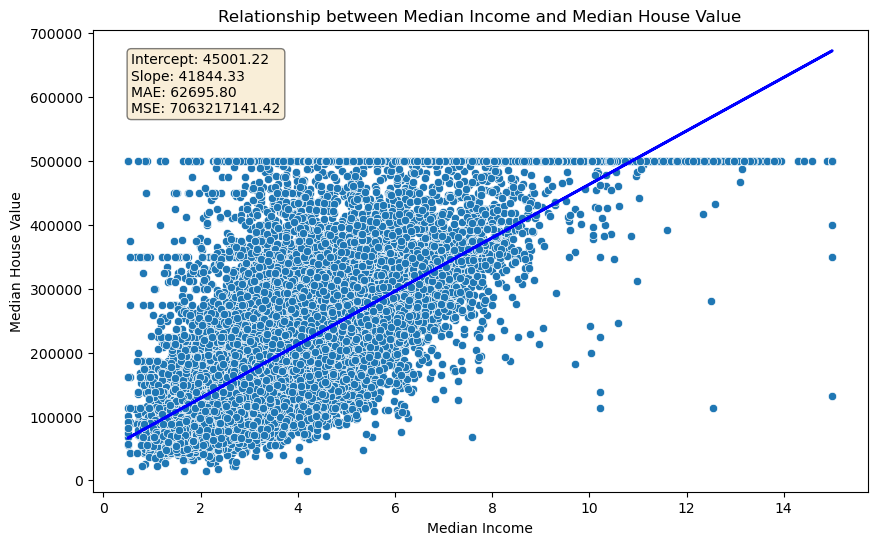

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_housing).set(
    title='Relationship between Median Income and Median House Value',
    xlabel='Median Income',
    ylabel='Median House Value')

# Plot the regression line
plt.plot(x1_test, y1_pred, color='blue', linewidth=2)

# Define the content of the text box
text = '\n'.join((
    f'Intercept: {lr1_intercept:.2f}',
    f'Slope: {lr1_slope:.2f}',
    f'MAE: {mae1:.2f}',
    f'MSE: {mse1:.2f}'
))
# Set the text box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#Add the text box
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.show()

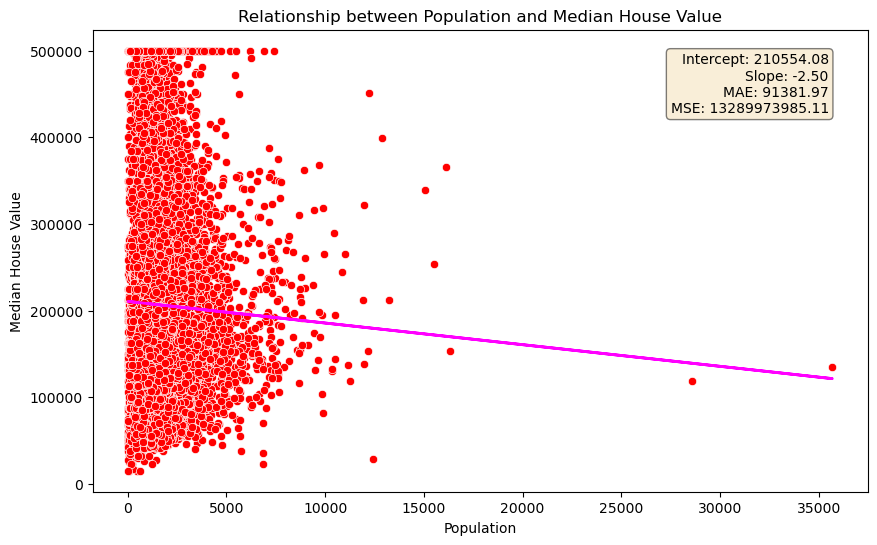

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=df_housing, color="red").set(
    title='Relationship between Population and Median House Value',
    xlabel='Population',
    ylabel='Median House Value')

# Plot the regression line
plt.plot(x2_test, y2_pred, color='magenta', linewidth=2)

# Define the content of the text box
text = '\n'.join((
    f'Intercept: {lr2_intercept:.2f}',
    f'Slope: {lr2_slope:.2f}',
    f'MAE: {mae2:.2f}',
    f'MSE: {mse2:.2f}'
))
# Set the text box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#Add the text box
plt.text(0.95, 0.95, text, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()

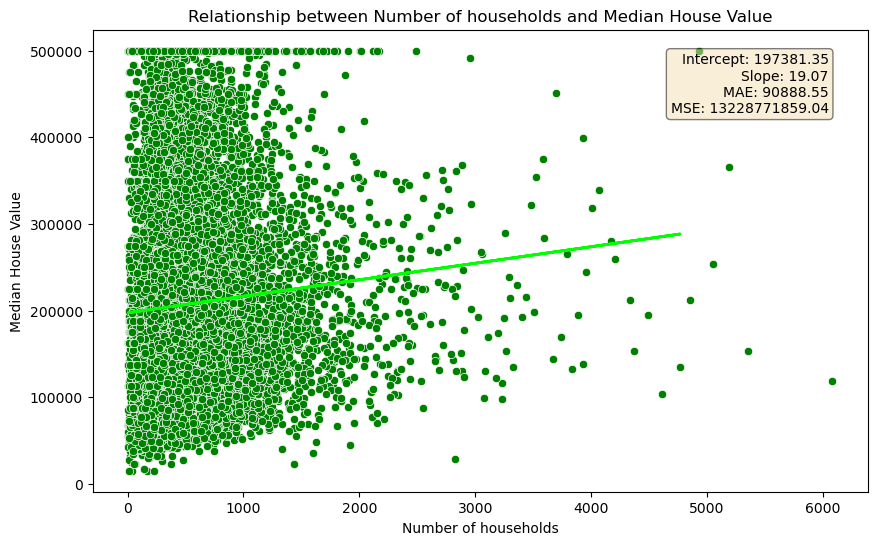

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=df_housing, color="green").set(
    title='Relationship between Number of households and Median House Value',
    xlabel='Number of households',
    ylabel='Median House Value')

# Plot the regression line
plt.plot(x3_test, y3_pred, color='lime', linewidth=2)

# Define the content of the text box
text = '\n'.join((
    f'Intercept: {lr3_intercept:.2f}',
    f'Slope: {lr3_slope:.2f}',
    f'MAE: {mae3:.2f}',
    f'MSE: {mse3:.2f}'
))
# Set the text box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#Add the text box
plt.text(0.95, 0.95, text, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()